In [1]:
import os, sys, glob
import h5py
import numpy as np
import matplotlib.pyplot as plt


if os.path.basename(os.getcwd()) == 'notebooks':
    sys.path.append('..')
    os.chdir('..')

import dataset

### Setup a data reader object for OADAT Single wavelength forearm data (SWFD) for semicircle (sc) array 

In [2]:
oadat_dir = '/mydata/dlbirhoui/firat/OADAT' ## switch with path to OADAT parent directory.
fname_SWFDsc = os.path.join(oadat_dir, 'SWFD_semicircle_RawBP.h5')
# fname_SWFDsc = os.path.join(oadat_dir, 'SCD_RawBP-mini.h5')

with h5py.File(fname_SWFDsc, 'r') as f:
    print(f.keys())
    pIDs = f['patientID'][()]
    unique_pIDs = np.unique(pIDs)
    pID_counts = {pID: np.sum(pIDs == pID) for pID in unique_pIDs}
    print(f'Unique patient IDs (and counts): {pID_counts}')
    num_images = f['sc_BP'].shape[0]

key = 'sc_BP' #semi-circle back-projection
prng = np.random.RandomState(42)
scaleclip_fn = lambda x: np.clip(x/np.max(x), a_min=-0.2, a_max=None) ## a standard scaling function for the optoacoustic iamge data.
dataset_obj = dataset.Dataset(fname_h5=fname_SWFDsc, key=key, transforms=scaleclip_fn, inds=None, shuffle=True, prng=prng)


<KeysViewHDF5 ['patientID', 'sc,lv128_BP', 'sc,lv128_raw', 'sc,ss128_BP', 'sc,ss128_raw', 'sc,ss32_BP', 'sc,ss32_raw', 'sc,ss64_BP', 'sc,ss64_raw', 'sc_BP', 'sc_raw', 'side', 'skin_type', 'sliceID']>
Unique patient IDs (and counts): {1: 2802, 2: 2802, 3: 2802, 4: 2802, 5: 2802, 6: 2802, 7: 2802, 8: 2802, 9: 2802, 10: 2802, 11: 2802, 12: 2802, 13: 2802, 14: 2802}


### Display a random image from the dataset

(256, 256)


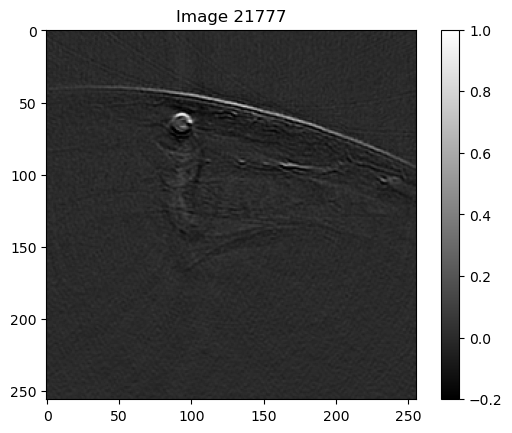

In [38]:
i = prng.randint(0, num_images)
x = dataset_obj[i]
x = x[0] ## drop the channel axis
print(x.shape)
plt.imshow(x, cmap='gray')
plt.title(f'Image {i}')
plt.colorbar()
plt.show()